# Outliers STAT Ship Group Project Final

### Import All Important Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from bioinfokit import visuz
from faker import Faker
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import cross_val_score, cross_val_predict

### Importing Dataset and Defining Dataframes

In [65]:
shipset = pd.read_excel("RegressionDataset.xlsx")

#### Exhibit 1

In [66]:
shipset.rename(columns={"Age at Sale": "Age_at_Sale"},inplace = True) ; shipset

,SaleDate,Vessel,Price,YearBuilt,Age_at_Sale,DWT,Capesize,Month
0,2022-01-07,Lowlands Beilun,73.0,1999,8,170.2,4647,1
1,2022-01-07,CHS Moon,45.0,1991,16,150.2,4647,1
2,2022-01-07,Spring Brave,62.0,1995,12,151.1,4647,1
3,2022-01-07,Martha Verity,60.0,1995,12,158.0,4647,1
4,2022-01-07,TMT TBN,61.3,1993,14,174.7,4647,1
5,2022-02-07,Pantelis SP,83.0,1999,8,169.9,4878,2
6,2022-02-07,Amazon,45.0,1990,17,149.5,4878,2
7,2022-03-07,Cape Kassos,100.0,2004,3,170.0,5245,3
8,2022-03-07,Johnny K,65.0,1994,13,165.3,5245,3
9,2022-03-07,Zorbas,70.0,1996,11,165.1,5245,3


### Mean, STD, and other Metrics for the variables

#### Exhibit 2

In [67]:
shipset.describe()

,Price,YearBuilt,Age_at_Sale,DWT,Capesize,Month
count,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,72.95625,1992.916667,14.270833,158.935417,7643.708333,5.312500
std,33.89537,6.330720,6.330405,17.650984,2499.309368,3.543987
min,22.00000,1981.000000,3.000000,98.400000,4647.000000,1.000000
25%,46.50000,1987.750000,10.750000,149.275000,5245.000000,3.000000
50%,66.00000,1994.000000,13.000000,161.450000,6799.000000,4.000000
75%,88.12500,1996.250000,20.000000,170.125000,9663.000000,8.250000
max,158.00000,2004.000000,26.000000,207.100000,12479.000000,12.000000


### Distributions of Variables in the dataset

#### Exhibit 3

Text(0.5, 1.0, 'Price Distribution')

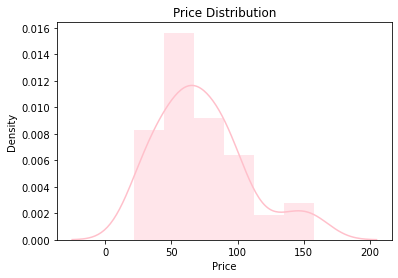

In [68]:
sns.distplot(shipset['Price'], color = 'pink')
plt.title("Price Distribution")

#### Exhibit 4

Text(0.5, 1.0, 'DWT Distribution')

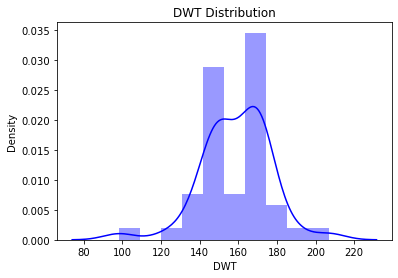

In [69]:
sns.distplot(shipset['DWT'], color = 'blue')
plt.title("DWT Distribution")

#### Exhibit 5

Text(0.5, 1.0, 'Age at Sale Distribution')

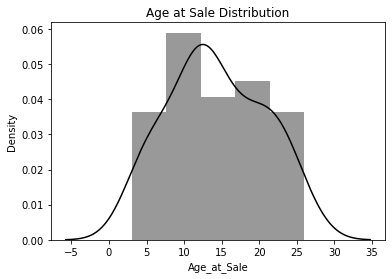

In [70]:
sns.distplot(shipset['Age_at_Sale'], color = 'black')
plt.title("Age at Sale Distribution")

#### Exhibit 6

Text(0.5, 1.0, 'Capesize Distribution')

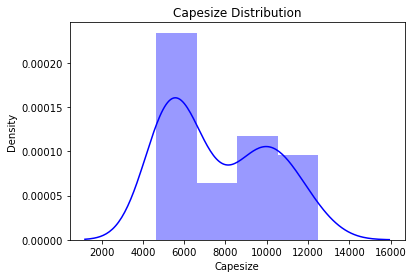

In [71]:
sns.distplot(shipset['Capesize'], color = 'blue')
plt.title("Capesize Distribution")

### Relations of Variables in the dataset

#### Exhibit 7

Text(0.5, 1.0, 'Age_at_Sale vs Price')

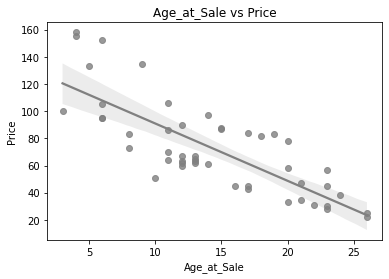

In [72]:
sns.regplot(x = shipset['Age_at_Sale'], y = shipset['Price'],marker = 'o', color = 'grey')
plt.title('Age_at_Sale vs Price')

#### Exhibit 8

Text(0.5, 1.0, 'Capesize vs Price')

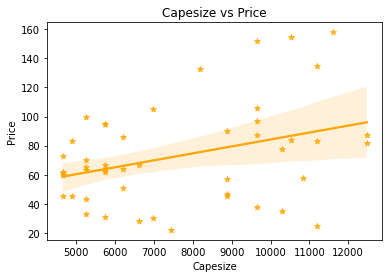

In [73]:
sns.regplot(x = shipset['Capesize'], y = shipset['Price'],marker = '*', color = 'orange')
plt.title('Capesize vs Price')

#### Exhibit 9

Text(0.5, 1.0, 'DWT vs Price')

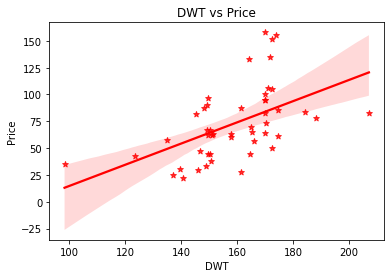

In [74]:
sns.regplot(x = shipset['DWT'], y = shipset['Price'],marker = '*', color = 'red')
plt.title('DWT vs Price')

#### Exhibit 10

Text(0.5, 1.0, 'Yearbuilt vs Price')

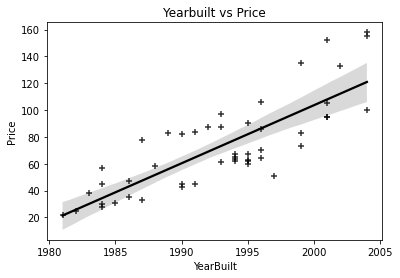

In [75]:
sns.regplot(x = shipset['YearBuilt'], y = shipset['Price'],marker = '+', color = 'black')
plt.title('Yearbuilt vs Price')

## Bet Performer Identification

#### Exhibit 11: Using Euclidean Distance Performed on Excel by Arunabh Choudhury

In [76]:
BetPerformer = pd.read_excel("s.xlsx","final") ; BetPerformer.sort_values(by = ['Euclidean Distance'], ascending = True).head(1)

,Vessel,Price,Euclidean Distance,Manhattan Distance
0,Cape Sun,135.0,0.185856,0.253952


### Correlation and VIF

#### Exhibit 12

In [77]:
shipset.corr()

,Price,YearBuilt,Age_at_Sale,DWT,Capesize,Month
Price,1.000000,0.808303,-0.787491,0.514805,0.352348,0.037932
YearBuilt,0.808303,1.000000,-0.998059,0.441826,-0.172633,-0.282364
Age_at_Sale,-0.787491,-0.998059,1.000000,-0.431264,0.217360,0.262640
DWT,0.514805,0.441826,-0.431264,1.000000,0.042766,-0.160653
Capesize,0.352348,-0.172633,0.217360,0.042766,1.000000,0.427984
Month,0.037932,-0.282364,0.262640,-0.160653,0.427984,1.000000


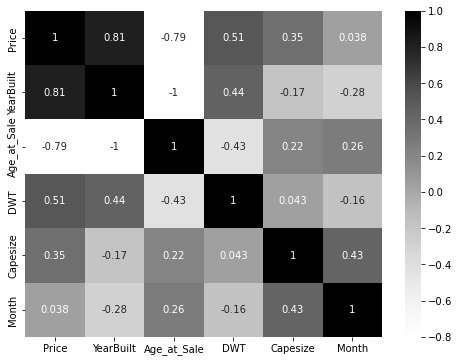

In [78]:
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(shipset.corr(),vmin=-0.8, annot=True, cmap='Greys',ax=ax);

#### Exhibit 13

In [79]:
Y, X = dmatrices('Price ~ DWT+Age_at_Sale+Capesize', data=shipset, return_type='dataframe')

In [80]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns ; vif

,VIF,variable
0,131.944976,Intercept
1,1.258727,DWT
2,1.318729,Age_at_Sale
3,1.075427,Capesize


## Linear Regression (without Standardization)

In [81]:
shipset_regression = shipset[["Age_at_Sale","DWT","Capesize","Price"]].copy() ; shipset_regression_results = shipset[["Age_at_Sale","DWT","Capesize","Price"]].copy()

In [82]:
X = shipset_regression.values[:,:-1] ; Y = shipset_regression.values[:,-1]

In [83]:
LR1 = LinearRegression().fit(X,Y)

In [84]:
m = LR1.coef_.flatten() ; b = LR1.intercept_.flatten()

In [85]:
print("m = {0}".format(m)) ; print("b = {0}".format(b))

m = [-4.54380392  0.24215462  0.00720692]
b = [44.22554998]


In [86]:
LR1_Y_predicted = LR1.predict(X)

In [87]:
shipset_regression_results['LR1_Y_predicted'] = LR1_Y_predicted

In [88]:
shipset_regression_results

,Age_at_Sale,DWT,Capesize,Price,LR1_Y_predicted
0,8,170.2,4647,73.0,82.580410
1,16,150.2,4647,45.0,41.386886
2,12,151.1,4647,62.0,59.780041
3,12,158.0,4647,60.0,61.450908
4,14,174.7,4647,61.3,56.407282
5,8,169.9,4878,83.0,84.172563
6,17,149.5,4878,45.0,38.338373
7,3,170.0,5245,100.0,109.560739
8,13,165.3,5245,65.0,62.984573
9,11,165.1,5245,70.0,72.023750


In [89]:
residuals_LR1 = Y - LR1_Y_predicted

In [90]:
shipset_regression_results['LR1 Residuals'] = residuals_LR1

In [91]:
r_squared_LR1 =  LR1.score(X, Y) ; print(r_squared_LR1)

0.9204352585883622


In [92]:
print(mean_absolute_error(Y, LR1_Y_predicted))

6.860174471941046


In [93]:
print(mean_squared_error(Y, LR1_Y_predicted))

89.50721469438948


### Residual Plot for Linear Regression (without Standardization)

#### Exhibit 14

(-75.0, 75.0)

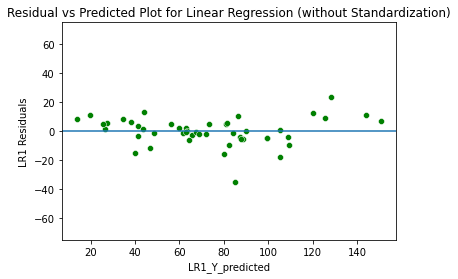

In [94]:
sns.scatterplot(data = shipset_regression_results, x = 'LR1_Y_predicted' , y = 'LR1 Residuals', color = 'green')
plt.title("Residual vs Predicted Plot for Linear Regression (without Standardization)")
plt.axhline(y=0)
plt.ylim(-75,75)

#### Exhibit 15

Text(0.5, 0, 'Residuals')

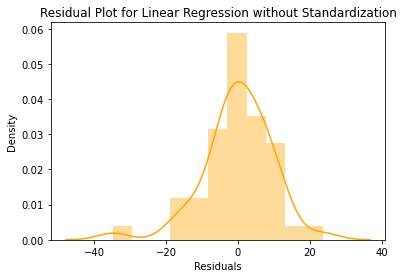

In [95]:
sns.distplot(residuals_LR1, color = 'orange')
plt.title("Residual Plot for Linear Regression without Standardization")
plt.xlabel("Residuals")

## Cross Validation of Linear Regression without Standardization

In [96]:
scores = cross_val_score(LR1, X, Y, cv=5)
print ("Cross-validated scores:", scores.mean())

Cross-validated scores: 0.8715531823056342


## OLS on Non Standardized Dataset

In [97]:
X = sm.add_constant(X)

In [98]:
ols1 = sm.OLS(Y, X).fit()

In [99]:
ols1_predictions = ols1.predict(X)

In [100]:
shipset_regression_results['OLS1_Y_predicted'] = ols1_predictions

In [101]:
shipset_regression_results['OLS1_Residuals'] = ols1.resid ; print(ols1.resid.mean())

4.794979228487743e-12


In [102]:
print(mean_absolute_error(Y, ols1_predictions))

6.860174471941328


In [103]:
print(mean_squared_error(Y, ols1_predictions))

89.50721469438948


In [104]:
shipset_regression_results

,Age_at_Sale,DWT,Capesize,Price,LR1_Y_predicted,LR1 Residuals,OLS1_Y_predicted,OLS1_Residuals
0,8,170.2,4647,73.0,82.580410,-9.580410,82.580410,-9.580410
1,16,150.2,4647,45.0,41.386886,3.613114,41.386886,3.613114
2,12,151.1,4647,62.0,59.780041,2.219959,59.780041,2.219959
3,12,158.0,4647,60.0,61.450908,-1.450908,61.450908,-1.450908
4,14,174.7,4647,61.3,56.407282,4.892718,56.407282,4.892718
5,8,169.9,4878,83.0,84.172563,-1.172563,84.172563,-1.172563
6,17,149.5,4878,45.0,38.338373,6.661627,38.338373,6.661627
7,3,170.0,5245,100.0,109.560739,-9.560739,109.560739,-9.560739
8,13,165.3,5245,65.0,62.984573,2.015427,62.984573,2.015427
9,11,165.1,5245,70.0,72.023750,-2.023750,72.023750,-2.023750


#### Exhibit 16

In [105]:
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     169.7
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           3.39e-24
Time:                        12:37:33   Log-Likelihood:                -175.97
No. Observations:                  48   AIC:                             359.9
Df Residuals:                      44   BIC:                             367.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.2255     16.383      2.699      0.010      11.207      77.244
x1            -4.5438      0.261    -17.378      0.000      -5.071      -4.017
x2             0.2422      0.092      2.643      0.011       0.058       0.427
x3             0.0072      0.001     12.051      0.000       0.006       0.008
==============================================================================
Omnibus:                       13.373   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.393
Skew:                          -0.851   Prob(JB):                     6.15e-05
Kurtosis:                       5.607   Cond. No.                     9.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## <font color='Blue'>  Linear Regression Equation </font>

## Price = Age_at_Sale*(-4.54) + DWT*(0.242) + Capesize*(0.00720) + 44.22

In [106]:
DWT_custom = float(input('What is the ship\'s DWT \n')) ;

What is the ship's DWT 
172


In [107]:
Age_at_Sale_custom = int(input('What is the ship\'s age during sale \n')) ;

What is the ship's age during sale 
11


In [108]:
Capesize_index = float(input('What is the ship\'s capesize \n')) ; 

What is the ship's capesize 
12479


In [109]:
Price_estimated =  DWT_custom*(0.242) + Capesize_index*(0.00720) + Age_at_Sale_custom*(-4.54) + 44.22 ; print("\nEstimated Price of the ship is = {0}".format(Price_estimated))


Estimated Price of the ship is = 125.75280000000001


# OLS on Standardized Dataset

In [110]:
shipset_standard = shipset[["Age_at_Sale","DWT","Capesize","Price"]].copy()

In [111]:
shipset_standard=(shipset_standard-shipset_standard.min())/(shipset_standard.max()-shipset_standard.min())

In [112]:
shipset_standard

,Age_at_Sale,DWT,Capesize,Price
0,0.217391,0.660534,0.000000,0.375000
1,0.565217,0.476541,0.000000,0.169118
2,0.391304,0.484821,0.000000,0.294118
3,0.391304,0.548298,0.000000,0.279412
4,0.478261,0.701932,0.000000,0.288971
5,0.217391,0.657774,0.029494,0.448529
6,0.608696,0.470101,0.029494,0.169118
7,0.000000,0.658694,0.076353,0.573529
8,0.434783,0.615455,0.076353,0.316176
9,0.347826,0.613615,0.076353,0.352941


Text(0.5, 1.0, 'Scaled DWT Distribution')

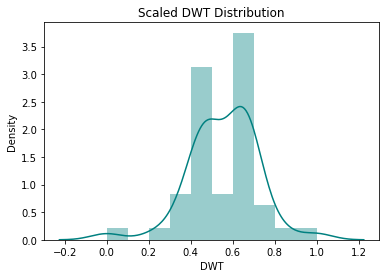

In [113]:
sns.distplot(shipset_standard['DWT'], color = 'teal')
plt.title("Scaled DWT Distribution")

In [114]:
XS = shipset_standard.values[:,:-1] ; Y = shipset_standard.values[:,-1]

In [115]:
XS = sm.add_constant(XS)

In [116]:
ols2 = sm.OLS(Y, XS).fit()

In [117]:
ols2_predictions = ols2.predict(XS)

In [118]:
ols2_residuals = ols2.resid

In [119]:
shipset_regression_results['OLS2_Residuals'] = ols2_residuals

In [120]:
shipset_regression_results['OLS2_Y_predicted'] = ols2_predictions

In [121]:
shipset_regression_results['OLS2_Y_predicted'] = shipset_regression_results['OLS2_Y_predicted']*136 + 22

In [122]:
shipset_regression_results

,Age_at_Sale,DWT,Capesize,Price,LR1_Y_predicted,LR1 Residuals,OLS1_Y_predicted,OLS1_Residuals,OLS2_Residuals,OLS2_Y_predicted
0,8,170.2,4647,73.0,82.580410,-9.580410,82.580410,-9.580410,-0.070444,82.580410
1,16,150.2,4647,45.0,41.386886,3.613114,41.386886,3.613114,0.026567,41.386886
2,12,151.1,4647,62.0,59.780041,2.219959,59.780041,2.219959,0.016323,59.780041
3,12,158.0,4647,60.0,61.450908,-1.450908,61.450908,-1.450908,-0.010668,61.450908
4,14,174.7,4647,61.3,56.407282,4.892718,56.407282,4.892718,0.035976,56.407282
5,8,169.9,4878,83.0,84.172563,-1.172563,84.172563,-1.172563,-0.008622,84.172563
6,17,149.5,4878,45.0,38.338373,6.661627,38.338373,6.661627,0.048983,38.338373
7,3,170.0,5245,100.0,109.560739,-9.560739,109.560739,-9.560739,-0.070300,109.560739
8,13,165.3,5245,65.0,62.984573,2.015427,62.984573,2.015427,0.014819,62.984573
9,11,165.1,5245,70.0,72.023750,-2.023750,72.023750,-2.023750,-0.014881,72.023750


In [123]:
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     169.7
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           3.39e-24
Time:                        12:37:43   Log-Likelihood:                 59.835
No. Observations:                  48   AIC:                            -111.7
Df Residuals:                      44   BIC:                            -104.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4847      0.054      9.002      0.000       0.376       0.593
x1            -0.7684      0.044    -17.378      0.000      -0.858      -0.679
x2             0.1935      0.073      2.643      0.011       0.046       0.341
x3             0.4150      0.034     12.051      0.000       0.346       0.484
==============================================================================
Omnibus:                       13.373   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.393
Skew:                          -0.851   Prob(JB):                     6.15e-05
Kurtosis:                       5.607   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Exhibit 18

Text(0.5, 0, 'Residuals')

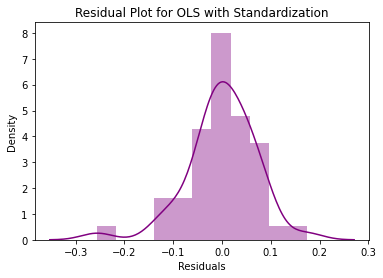

In [124]:
sns.distplot(ols2_residuals, color = 'purple')
plt.title("Residual Plot for OLS with Standardization")
plt.xlabel("Residuals")

#### Exhibit 19

(-30.0, 30.0)

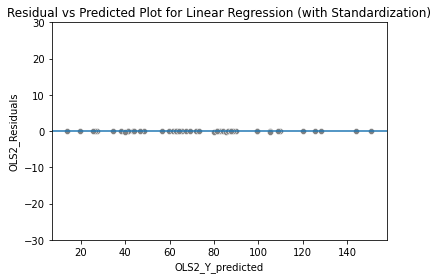

In [125]:
sns.scatterplot(data = shipset_regression_results, x = 'OLS2_Y_predicted' , y = 'OLS2_Residuals', color = 'grey')
plt.title("Residual vs Predicted Plot for Linear Regression (with Standardization)")
plt.axhline(y=0)
plt.ylim(-30,30)

In [126]:
print(mean_absolute_error(Y, ols2_predictions))

0.050442459352507706


# Synthetic Data: Created by Gretel.AI with 86% similarity rate

In [127]:
synthdata = pd.read_csv('syntheticdata.csv') ; synthdata ;  synthdata.rename(columns={"Age at Sale": "Age_at_Sale"},inplace = True)

In [128]:
synthdata.drop('Vessel',axis = 1,inplace = True)

In [129]:
synthdata = synthdata.loc[3000:3249]

Text(0.5, 1.0, 'Age_at_Sale vs Price')

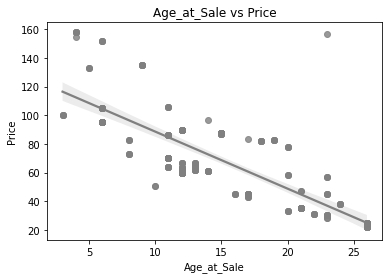

In [130]:
sns.regplot(x = synthdata['Age_at_Sale'], y = synthdata['Price'],marker = 'o', color = 'grey')
plt.title('Age_at_Sale vs Price')

Text(0.5, 1.0, 'Age_at_Sale vs Price')

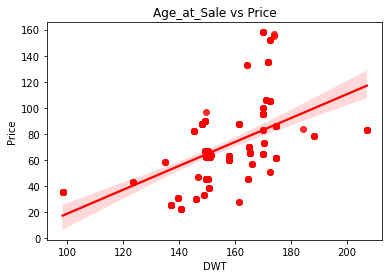

In [131]:
sns.regplot(x = synthdata['DWT'], y = synthdata['Price'],marker = 'o', color = 'red')
plt.title('Age_at_Sale vs Price')

Text(0.5, 1.0, 'Age_at_Sale vs Price')

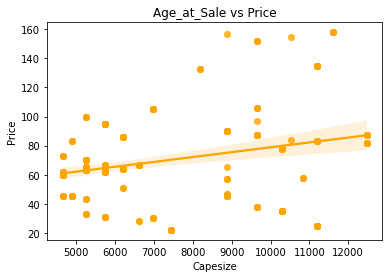

In [132]:
sns.regplot(x = synthdata['Capesize'], y = synthdata['Price'],marker = 'o', color = 'orange')
plt.title('Age_at_Sale vs Price')

In [133]:
synthdata.corr()

,Price,YearBuilt,Age_at_Sale,DWT,Capesize,Month
Price,1.000000,0.783345,-0.764145,0.547482,0.266079,0.061637
YearBuilt,0.783345,1.000000,-0.998150,0.503380,-0.252008,-0.286505
Age_at_Sale,-0.764145,-0.998150,1.000000,-0.494307,0.293563,0.270693
DWT,0.547482,0.503380,-0.494307,1.000000,-0.130340,-0.292551
Capesize,0.266079,-0.252008,0.293563,-0.130340,1.000000,0.519398
Month,0.061637,-0.286505,0.270693,-0.292551,0.519398,1.000000


Text(0.5, 1.0, 'Synthetic Price Distribution')

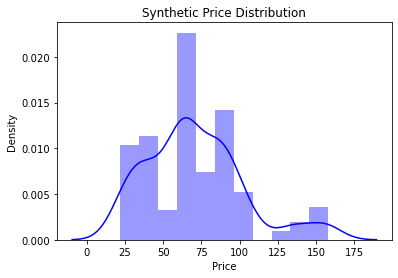

In [134]:
sns.distplot(synthdata['Price'], color = 'blue')
plt.title("Synthetic Price Distribution")

Text(0.5, 1.0, 'Synthetic Price Distribution')

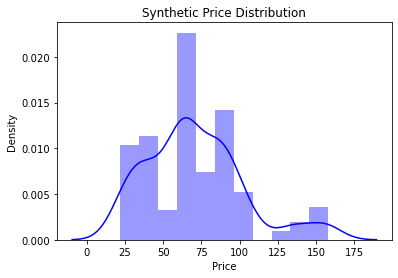

In [135]:
sns.distplot(synthdata['Price'], color = 'blue')
plt.title("Synthetic Price Distribution")

In [136]:
fake = Faker()

In [137]:
data = [
             { 
               "Vessel": fake.company(),
             }
             for i in range(5000)
         ]


In [138]:
fake_vessel = pd.DataFrame(data = data) ; fake_vessel ; synthdata['Vessel'] = fake_vessel

# <font color='green'> Linear Regression by Treating Original Dataset as Training and Synthetic Data as Test </font>

In [139]:
X_train = shipset_regression.values[:,:-1] ;Y_train = shipset_regression.values[:,-1] 

In [140]:
synthdata_regression = synthdata[["Age_at_Sale","DWT","Capesize","Price"]].copy() ; 

In [141]:
X_test = synthdata_regression.values[:,:-1]; Y_test = synthdata_regression.values[:,-1]

In [142]:
LR_synth = LinearRegression().fit(X_train, Y_train)

In [143]:
LR_synth_predicted = LR_synth.predict(X_test)

In [144]:
LR_synth.score(X_test,Y_test)

0.8766474942576405

In [145]:
Y_synth_predicted = LR_synth.predict(X_test)

In [146]:
LR_Synth_Residuals = Y_test - Y_synth_predicted

In [147]:
#synthdata_regression['LR_Synth_Predicted Values'] = Y_synth_predicted ; 
#synthdata_regression['LR_Synth_Residuals'] = LR_Synth_Residuals


In [148]:
print(mean_absolute_error(Y_test, Y_synth_predicted)) ; 

print(mean_squared_error(Y_test, Y_synth_predicted))

6.9132861257138725
124.20078328000722


Text(0.5, 0, 'Residuals')

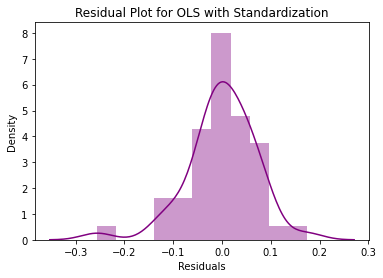

In [149]:
sns.distplot(ols2_residuals, color = 'purple')
plt.title("Residual Plot for OLS with Standardization")
plt.xlabel("Residuals")

In [150]:
m = LR_synth.coef_.flatten() ; b = LR_synth.intercept_.flatten() ; print("m = {0}".format(m)) ; print("b = {0}".format(b))

m = [-4.54380392  0.24215462  0.00720692]
b = [44.22554998]


# <font color='green'> OLS by Treating Original Dataset as Training and Synthetic Data as Test </font>

#### Exhibit 20

In [151]:
synthdata.describe()

,Price,YearBuilt,Age_at_Sale,DWT,Capesize,Month
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,70.704800,1992.668000,14.496000,156.716000,7567.416000,5.436000
std,31.794977,6.065057,6.094469,18.951273,2523.703905,3.556473
min,22.000000,1981.000000,3.000000,98.400000,4647.000000,1.000000
25%,45.000000,1988.000000,11.000000,149.000000,5245.000000,3.000000
50%,65.000000,1994.000000,13.000000,158.000000,6618.000000,4.000000
75%,87.500000,1996.000000,20.000000,170.100000,9663.000000,8.750000
max,158.000000,2004.000000,26.000000,207.100000,12479.000000,12.000000


In [152]:
shipset.describe()

,Price,YearBuilt,Age_at_Sale,DWT,Capesize,Month
count,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,72.95625,1992.916667,14.270833,158.935417,7643.708333,5.312500
std,33.89537,6.330720,6.330405,17.650984,2499.309368,3.543987
min,22.00000,1981.000000,3.000000,98.400000,4647.000000,1.000000
25%,46.50000,1987.750000,10.750000,149.275000,5245.000000,3.000000
50%,66.00000,1994.000000,13.000000,161.450000,6799.000000,4.000000
75%,88.12500,1996.250000,20.000000,170.125000,9663.000000,8.250000
max,158.00000,2004.000000,26.000000,207.100000,12479.000000,12.000000


In [153]:
Y_synth, X_synth = dmatrices('Price ~ DWT+Age_at_Sale+Capesize', data=synthdata_regression, return_type='dataframe')

In [154]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_synth.values, i) for i in range(X_synth.shape[1])]
vif['variable'] = X_synth.columns ; vif

,VIF,variable
0,130.130663,Intercept
1,1.323765,DWT
2,1.423994,Age_at_Sale
3,1.094652,Capesize


In [155]:
X_test = sm.add_constant(X_test) ; X_train = sm.add_constant(X_train)

In [156]:
ols_synth = sm.OLS(Y_train, X_train).fit()

In [157]:
predictions_synth = ols_synth.predict(X_test)

In [158]:
#synthdata_regression['OLS_Synth_Predicted Values'] = predictions_synth
#synthdata_regression['OLS_Synth_Residuals']= abs(synthdata_regression['Price'] - synthdata_regression['OLS_Synth_Predicted Values'])

In [159]:
print(mean_absolute_error(Y_test, predictions_synth))

6.913286125713921


In [160]:
print(mean_squared_error(Y_test, predictions_synth))

124.20078328001003


In [161]:
ols_synth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     169.7
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           3.39e-24
Time:                        12:37:44   Log-Likelihood:                -175.97
No. Observations:                  48   AIC:                             359.9
Df Residuals:                      44   BIC:                             367.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.2255     16.383      2.699      0.010      11.207      77.244
x1            -4.5438      0.261    -17.378      0.000      -5.071      -4.017
x2             0.2422      0.092      2.643      0.011       0.058       0.427
x3             0.0072      0.001     12.051      0.000       0.006       0.008
==============================================================================
Omnibus:                       13.373   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.393
Skew:                          -0.851   Prob(JB):                     6.15e-05
Kurtosis:                       5.607   Cond. No.                     9.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Exhibit 21

Text(0.5, 1.0, 'Residual Plots for Synthetic Data')

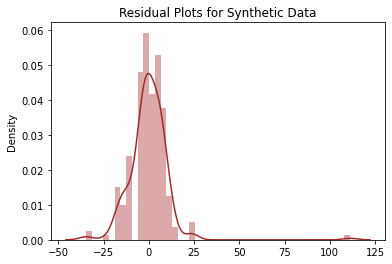

In [162]:
sns.distplot(LR_Synth_Residuals,color = 'brown')
plt.title("Residual Plots for Synthetic Data")

(-75.0, 75.0)

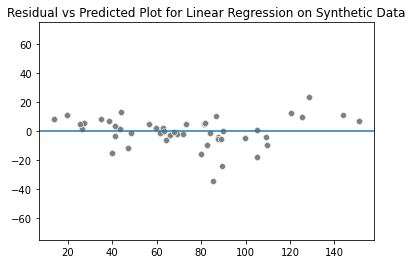

In [164]:
sns.scatterplot(x = predictions_synth , y = LR_Synth_Residuals, color = 'grey')
plt.title("Residual vs Predicted Plot for Linear Regression on Synthetic Data")
plt.axhline(y=0)
plt.ylim(-75,75)

#### Exhibit 22

# <font color='Orange'><center>Thank You</center></font>